In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/rfm.csv')
rfm_data = df[['RFM']]

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=4, random_state=42)

In [5]:
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
cluster_counts = pd.Series(cluster_labels).value_counts()

print("Cluster Labels:", cluster_labels)
print("Cluster Centroids:", cluster_centers)
print("Cluster Counts:", cluster_counts)

Cluster Labels: [2 2 2 ... 3 3 3]
Cluster Centroids: [[-0.49361256]
 [ 0.40416985]
 [-1.40422205]
 [ 1.30144414]]
Cluster Counts: 1    108876
3    104357
0    101067
2     92529
dtype: int64


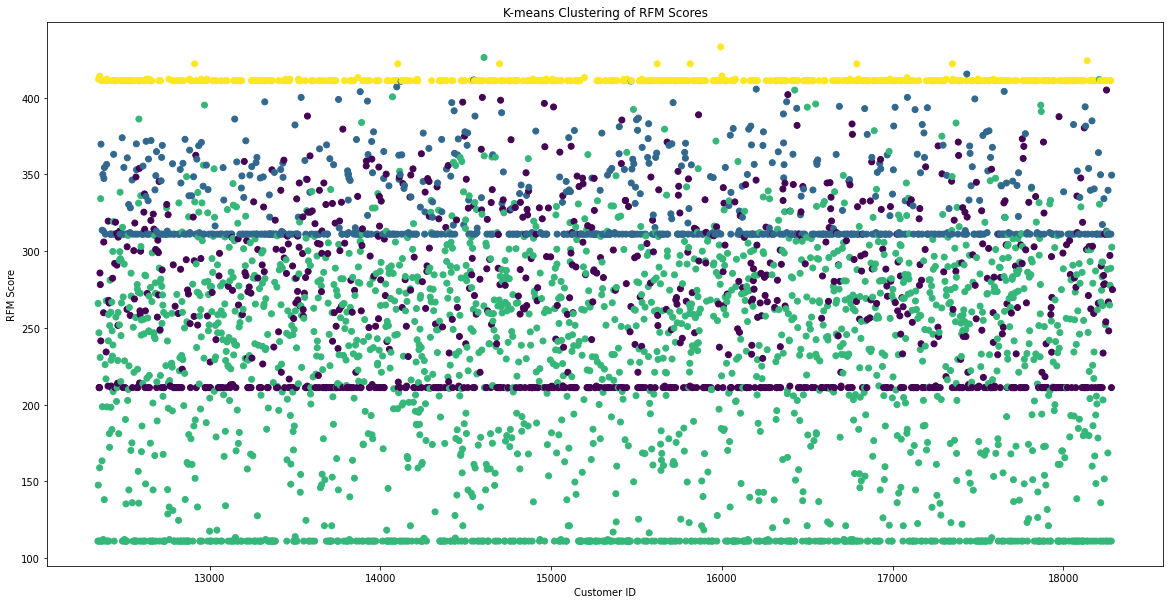

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = df[['RFM']]  # Select the RFM scores as the input for clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['cluster_labels'] = cluster_labels

grouped_df = df.groupby('CustomerID')['RFM'].mean().reset_index()

# Get the cluster labels for each unique customer ID
customer_clusters = df.groupby('CustomerID')['cluster_labels'].first().reset_index()

# Merge the mean RFM scores and cluster labels
merged_df = pd.merge(grouped_df, customer_clusters, on='CustomerID')

# Plot the RFM scores against the unique customer IDs with cluster labels
plt.figure(figsize=(20, 10))
plt.scatter(merged_df['CustomerID'], merged_df['RFM'], c=merged_df['cluster_labels'], cmap='viridis')
plt.xlabel('Customer ID')
plt.ylabel('RFM Score')
plt.title('K-means Clustering of RFM Scores')
plt.show()

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Money,Money_value,Monetary_Quartile,RFM,cluster_labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,15.30,5288.63,3,143,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,22.00,5288.63,3,143,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2


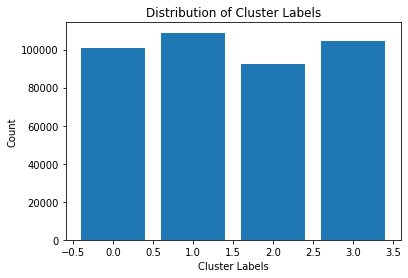

In [11]:
# Count the occurrences of each cluster label
cluster_counts = df['cluster_labels'].value_counts()

# Plot the cluster labels
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.title('Distribution of Cluster Labels')
plt.show()


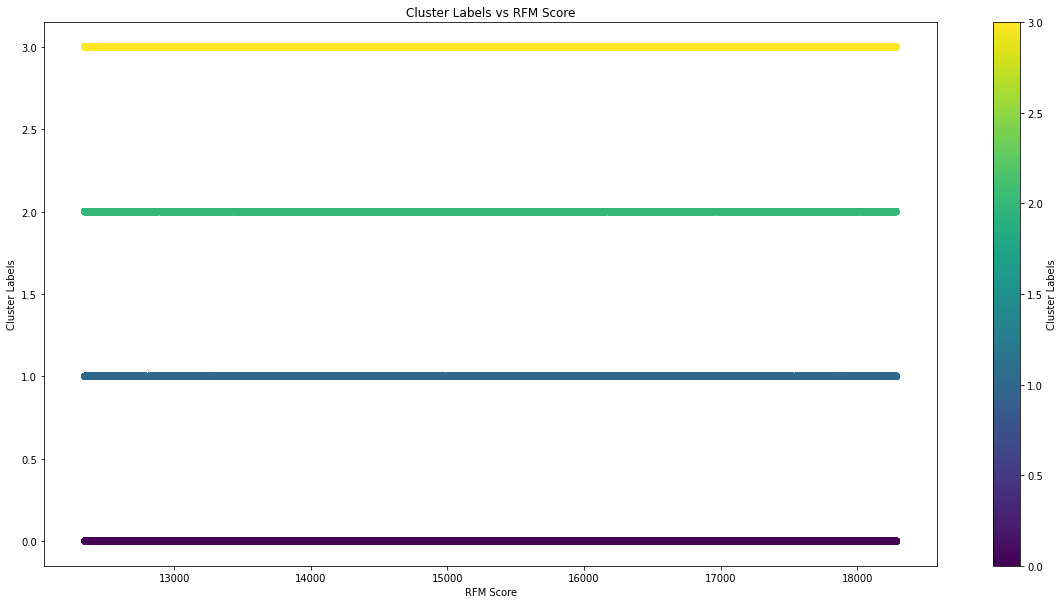

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(df['CustomerID'], df['cluster_labels'], c=df['cluster_labels'], cmap='viridis')
plt.xlabel('RFM Score')
plt.ylabel('Cluster Labels')
plt.title('Cluster Labels vs RFM Score')
plt.colorbar(label='Cluster Labels')
plt.show()

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Money,Money_value,Monetary_Quartile,RFM,cluster_labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,15.30,5288.63,3,143,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,22.00,5288.63,3,143,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2


In [14]:
df.to_csv('Data/cluster_label.csv', index=False)

In [15]:
df_cluster1 = df[df['cluster_labels'] == 1]
df_cluster2 = df[df['cluster_labels'] == 2]
df_cluster3 = df[df['cluster_labels'] == 3]
df_cluster4 = df[df['cluster_labels'] == 4]

df_cluster1.to_csv('Data/cluster_label_1.csv', index=False)
df_cluster2.to_csv('Data/cluster_label_2.csv', index=False)
df_cluster3.to_csv('Data/cluster_label_3.csv', index=False)
df_cluster4.to_csv('Data/cluster_label_4.csv', index=False)

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Money,Money_value,Monetary_Quartile,RFM,cluster_labels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,15.30,5288.63,3,143,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,22.00,5288.63,3,143,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2


In [17]:
recency_threshold = 3  # Example: Customers with recency <= 3 are classified as 'High-Recency'
frequency_threshold = 3  # Example: Customers with frequency >= 3 are classified as 'High-Frequency'
monetary_threshold = 3  # Example: Customers with monetary value >= 3 are classified as 'High-Monetary'

# Create a function to classify customers based on the RFM scores and thresholds
def classify_customer(row):
    if row['Date_Quartile'] >= recency_threshold and row['Frequency_Quartile'] >= frequency_threshold and row['Monetary_Quartile'] >= monetary_threshold:
        return 'High-Value, High-Frequency'
    elif row['Date_Quartile'] >= recency_threshold and row['Frequency_Quartile'] < frequency_threshold and row['Monetary_Quartile'] >= monetary_threshold:
        return 'High-Value, Low-Frequency'
    elif row['Date_Quartile'] < recency_threshold and row['Frequency_Quartile'] >= frequency_threshold and row['Monetary_Quartile'] >= monetary_threshold:
        return 'Low-Value, High-Frequency'
    else:
        return 'Low-Value, Low-Frequency'

# Apply the classification function to each row of the DataFrame and create a new column 'Segment'
df['Segment'] = df.apply(classify_customer, axis=1)

# Print the updated DataFrame with the 'Segment' column

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Money,Money_value,Monetary_Quartile,RFM,cluster_labels,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,15.30,5288.63,3,143,2,"Low-Value, High-Frequency"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2,"Low-Value, High-Frequency"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,22.00,5288.63,3,143,2,"Low-Value, High-Frequency"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2,"Low-Value, High-Frequency"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2,"Low-Value, High-Frequency"


In [19]:
df_cluster1 = df[df['cluster_labels'] == 1]
df_cluster2 = df[df['cluster_labels'] == 2]
df_cluster3 = df[df['cluster_labels'] == 3]
df_cluster4 = df[df['cluster_labels'] == 4]

df_cluster1.to_csv('Data/cluster_label_1.csv', index=False)
df_cluster2.to_csv('Data/cluster_label_2.csv', index=False)
df_cluster3.to_csv('Data/cluster_label_3.csv', index=False)
df_cluster4.to_csv('Data/cluster_label_4.csv', index=False)

In [20]:
# Assuming you want to create a separate DataFrame with columns 'CustomerID', 'Recency', and 'Segment'

# Create a new DataFrame with the desired columns
new_df = df[['CustomerID', 'Country', 'Segment']].copy()

# Print the new DataFrame
new_df.head()


,CustomerID,Country,Segment
0,17850.0,United Kingdom,"Low-Value, High-Frequency"
1,17850.0,United Kingdom,"Low-Value, High-Frequency"
2,17850.0,United Kingdom,"Low-Value, High-Frequency"
3,17850.0,United Kingdom,"Low-Value, High-Frequency"
4,17850.0,United Kingdom,"Low-Value, High-Frequency"


In [21]:
new_df.to_csv('Data/segmentation.csv', index=False)

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Money,Money_value,Monetary_Quartile,RFM,cluster_labels,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,15.30,5288.63,3,143,2,"Low-Value, High-Frequency"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2,"Low-Value, High-Frequency"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,22.00,5288.63,3,143,2,"Low-Value, High-Frequency"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2,"Low-Value, High-Frequency"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143,2,"Low-Value, High-Frequency"


In [23]:
df.to_csv('Data/segmentation_main.csv', index=False)